In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
# mouse_data.head()
clinical_data = pd.read_csv(clinical_trial_data_to_load)
# clinical_data.head()

# # # Combine the data into a single dataset
# Display the data table for preview
merge_table = pd.merge(mouse_data, clinical_data, on="Mouse ID")
merge_table.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# merge_table.columns

# # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# #group by drug and timepoint
grouped_data = merge_table.groupby(["Drug", "Timepoint"])
grouped_data.head()

# #Mean tumor volume
# Didn't work --> mean_tumor = grouped_data.mean("Tumor Volume (mm3)")
mean_tumor = grouped_data.agg({'Tumor Volume (mm3)':['mean']})
mean_tumor.head()
                  


Tumor Volume (mm3)
                                  mean
Drug      Timepoint                   
Capomulin 0                  45.000000
          5                  44.266086
          10                 43.084291
          15                 42.064317
          20                 40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
mean_tumor_sem = grouped_data.agg({'Tumor Volume (mm3)':['sem']})
mean_tumor_sem.head()



Tumor Volume (mm3)
                                   sem
Drug      Timepoint                   
Capomulin 0                   0.000000
          5                   0.448593
          10                  0.702684
          15                  0.838617
          20                  0.909731

In [4]:
#combine SEM and mean
mean_tumor_reformat = grouped_data.agg({"Tumor Volume (mm3)":["mean", "sem"]})
mean_tumor_reformat.head()
             

Tumor Volume (mm3)          
                                  mean       sem
Drug      Timepoint                             
Capomulin 0                  45.000000  0.000000
          5                  44.266086  0.448593
          10                 43.084291  0.702684
          15                 42.064317  0.838617
          20                 40.716325  0.909731

In [5]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_tumor_reformat_reset = mean_tumor_reformat.reset_index()
mean_tumor_reformat_reset.columns = ['Drug', 'Timepoint', 'Tumor Mean', 'Tumor Error']

# Pivot data for better printing

drugs_tumors_df = mean_tumor_reformat_reset.pivot(index="Timepoint", columns="Drug", values="Tumor Mean")

# Print data

drugs_tumors_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


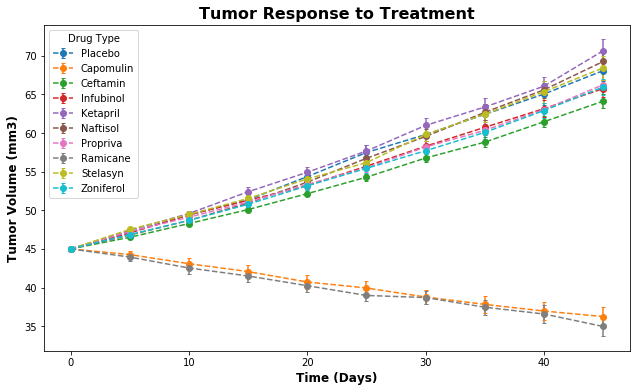

In [6]:
# Generate the Plot (with Error Bars)
#  Save the Figure
#  Show the Figure
# Divide aggregated dataset by drug type

placebo_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Placebo', :]
capomulin_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Capomulin', :]
ceftamin_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Ceftamin', :]
infubinol_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Infubinol', :]
ketapril_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Ketapril', :]
naftisol_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Naftisol', :]
propriva_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Propriva', :]
ramicane_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Ramicane', :]
stelasyn_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Stelasyn', :]
zoniferol_tumor_df = mean_tumor_reformat_reset.loc[mean_tumor_reformat_reset['Drug'] == 'Zoniferol', :]

# Assign tumor volume means and standard errors to distinct variables for each drug

placebo_tumor_means = placebo_tumor_df['Tumor Mean']
placebo_tumor_errors = placebo_tumor_df['Tumor Error']

capomulin_tumor_means = capomulin_tumor_df['Tumor Mean']
capomulin_tumor_errors = capomulin_tumor_df['Tumor Error']

ceftamin_tumor_means = ceftamin_tumor_df['Tumor Mean']
ceftamin_tumor_errors = ceftamin_tumor_df['Tumor Error']

infubinol_tumor_means = infubinol_tumor_df['Tumor Mean']
infubinol_tumor_errors = infubinol_tumor_df['Tumor Error']

ketapril_tumor_means = ketapril_tumor_df['Tumor Mean']
ketapril_tumor_errors = ketapril_tumor_df['Tumor Error']

naftisol_tumor_means = naftisol_tumor_df['Tumor Mean']
naftisol_tumor_errors = naftisol_tumor_df['Tumor Error']

propriva_tumor_means = propriva_tumor_df['Tumor Mean']
propriva_tumor_errors = propriva_tumor_df['Tumor Error']

ramicane_tumor_means = ramicane_tumor_df['Tumor Mean']
ramicane_tumor_errors = ramicane_tumor_df['Tumor Error']

stelasyn_tumor_means = stelasyn_tumor_df['Tumor Mean']
stelasyn_tumor_errors = stelasyn_tumor_df['Tumor Error']

zoniferol_tumor_means = zoniferol_tumor_df['Tumor Mean']
zoniferol_tumor_errors = zoniferol_tumor_df['Tumor Error']

# Set x-axis values for chart

x_axis = drugs_tumors_df.index.values

# Format chart (size, labels, title)

fig, ax = plt.subplots(figsize=(10.5,6))
ax.set_xlabel("Time (Days)", fontsize=12, fontweight='bold')
ax.set_ylabel("Tumor Volume (mm3)", fontsize=12, fontweight='bold')
ax.set_title("Tumor Response to Treatment", fontsize=16, fontweight='bold')

# Add data to chart

ax.errorbar(x_axis, placebo_tumor_means, placebo_tumor_errors, fmt="--o", capsize=2, label="Placebo")
ax.errorbar(x_axis, capomulin_tumor_means, capomulin_tumor_errors, fmt="--o", capsize=2, label="Capomulin")
ax.errorbar(x_axis, ceftamin_tumor_means, ceftamin_tumor_errors, fmt="--o", capsize=2, label="Ceftamin")
ax.errorbar(x_axis, infubinol_tumor_means, infubinol_tumor_errors, fmt="--o", capsize=2, label="Infubinol")
ax.errorbar(x_axis, ketapril_tumor_means, ketapril_tumor_errors, fmt="--o", capsize=2, label="Ketapril")
ax.errorbar(x_axis, naftisol_tumor_means, naftisol_tumor_errors, fmt="--o", capsize=2, label="Naftisol")
ax.errorbar(x_axis, propriva_tumor_means, propriva_tumor_errors, fmt="--o", capsize=2, label="Propriva")
ax.errorbar(x_axis, ramicane_tumor_means, ramicane_tumor_errors, fmt="--o", capsize=2, label="Ramicane")
ax.errorbar(x_axis, stelasyn_tumor_means, stelasyn_tumor_errors, fmt="--o", capsize=2, label="Stelasyn")
ax.errorbar(x_axis, zoniferol_tumor_means, zoniferol_tumor_errors, fmt="--o", capsize=2, label="Zoniferol")

# Add Legend

ax.legend(loc="upper left", title="Drug Type")
# Generate the Plot (with Error Bars)

# Save the Figure
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

metastatic_tumor = grouped_data.agg({'Metastatic Sites':['mean']})
metastatic_tumor.head()
                  

Metastatic Sites
                                mean
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.160000
          10                0.320000
          15                0.375000
          20                0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
metastatic_tumor_sem = grouped_data.agg({'Metastatic Sites':['sem']})
metastatic_tumor_sem.head()


Metastatic Sites
                                 sem
Drug      Timepoint                 
Capomulin 0                 0.000000
          5                 0.074833
          10                0.125433
          15                0.132048
          20                0.161621

In [9]:
#combine SEM and mean
metastatic_tumor_reformat = grouped_data.agg({"Metastatic Sites":["mean", "sem"]})
metastatic_tumor_reformat.head()
             

Metastatic Sites          
                                mean       sem
Drug      Timepoint                           
Capomulin 0                 0.000000  0.000000
          5                 0.160000  0.074833
          10                0.320000  0.125433
          15                0.375000  0.132048
          20                0.652174  0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames

# # Preview that Reformatting worked
metastatic_tumor_reformat_reset = metastatic_tumor_reformat.reset_index()
metastatic_tumor_reformat_reset.columns = ['Drug', 'Timepoint', 'Metastatic Mean', 'Metastatic Error']

# Pivot data for better printing

drugs_metastatic_tumors_df = metastatic_tumor_reformat_reset.pivot(index="Timepoint", columns="Drug", values="Metastatic Mean")

# Print data

drugs_metastatic_tumors_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


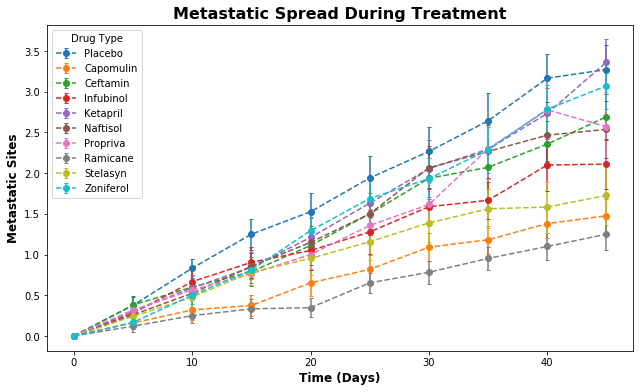

In [11]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
# Divide aggregated dataset by drug type

placebo_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Placebo', :]
capomulin_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Capomulin', :]
ceftamin_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Ceftamin', :]
infubinol_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Infubinol', :]
ketapril_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Ketapril', :]
naftisol_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Naftisol', :]
propriva_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Propriva', :]
ramicane_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Ramicane', :]
stelasyn_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Stelasyn', :]
zoniferol_metastatic_df = metastatic_tumor_reformat_reset.loc[metastatic_tumor_reformat_reset['Drug'] == 'Zoniferol', :]

# Assign tumor volume means and standard errors to distinct variables for each drug

placebo_metastatic_means = placebo_metastatic_df['Metastatic Mean']
placebo_metastatic_errors = placebo_metastatic_df['Metastatic Error']

capomulin_metastatic_means = capomulin_metastatic_df['Metastatic Mean']
capomulin_metastatic_errors = capomulin_metastatic_df['Metastatic Error']

ceftamin_metastatic_means = ceftamin_metastatic_df['Metastatic Mean']
ceftamin_metastatic_errors = ceftamin_metastatic_df['Metastatic Error']

infubinol_metastatic_means = infubinol_metastatic_df['Metastatic Mean']
infubinol_metastatic_errors = infubinol_metastatic_df['Metastatic Error']

ketapril_metastatic_means = ketapril_metastatic_df['Metastatic Mean']
ketapril_metastatic_errors = ketapril_metastatic_df['Metastatic Error']

naftisol_metastatic_means = naftisol_metastatic_df['Metastatic Mean']
naftisol_metastatic_errors = naftisol_metastatic_df['Metastatic Error']

propriva_metastatic_means = propriva_metastatic_df['Metastatic Mean']
propriva_metastatic_errors = propriva_metastatic_df['Metastatic Error']

ramicane_metastatic_means = ramicane_metastatic_df['Metastatic Mean']
ramicane_metastatic_errors = ramicane_metastatic_df['Metastatic Error']

stelasyn_metastatic_means = stelasyn_metastatic_df['Metastatic Mean']
stelasyn_metastatic_errors = stelasyn_metastatic_df['Metastatic Error']

zoniferol_metastatic_means = zoniferol_metastatic_df['Metastatic Mean']
zoniferol_metastatic_errors = zoniferol_metastatic_df['Metastatic Error']

# Set x-axis values for chart


x_axis = drugs_metastatic_tumors_df.index.values

# Format chart (size, labels, title)

fig, ax = plt.subplots(figsize=(10.5,6))
ax.set_xlabel("Time (Days)", fontsize=12, fontweight='bold')
ax.set_ylabel("Metastatic Sites", fontsize=12, fontweight='bold')
ax.set_title("Metastatic Spread During Treatment", fontsize=16, fontweight='bold')

# Add data to chart

ax.errorbar(x_axis, placebo_metastatic_means, placebo_metastatic_errors, fmt="--o", capsize=2, label="Placebo")
ax.errorbar(x_axis, capomulin_metastatic_means, capomulin_metastatic_errors, fmt="--o", capsize=2, label="Capomulin")
ax.errorbar(x_axis, ceftamin_metastatic_means, ceftamin_metastatic_errors, fmt="--o", capsize=2, label="Ceftamin")
ax.errorbar(x_axis, infubinol_metastatic_means, infubinol_metastatic_errors, fmt="--o", capsize=2, label="Infubinol")
ax.errorbar(x_axis, ketapril_metastatic_means, ketapril_metastatic_errors, fmt="--o", capsize=2, label="Ketapril")
ax.errorbar(x_axis, naftisol_metastatic_means, naftisol_metastatic_errors, fmt="--o", capsize=2, label="Naftisol")
ax.errorbar(x_axis, propriva_metastatic_means, propriva_metastatic_errors, fmt="--o", capsize=2, label="Propriva")
ax.errorbar(x_axis, ramicane_metastatic_means, ramicane_metastatic_errors, fmt="--o", capsize=2, label="Ramicane")
ax.errorbar(x_axis, stelasyn_metastatic_means, stelasyn_metastatic_errors, fmt="--o", capsize=2, label="Stelasyn")
ax.errorbar(x_axis, zoniferol_metastatic_means, zoniferol_metastatic_errors, fmt="--o", capsize=2, label="Zoniferol")

# Add Legend

ax.legend(loc="upper left", title="Drug Type")
# Generate the Plot (with Error Bars)

# Save the Figure
# Show the Figure
# plt.show()

## Survival Rates

In [27]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
                  
mouse_count_df = grouped_data['Mouse ID'].count()
mouse_count_df.head()



Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [33]:
# Minor Data Munging to Re-Format the Data Frames

# # Preview that Reformatting worked
mouse_count_reset = mouse_count_df.reset_index()
mouse_count_reset.columns = ['Drug', 'Timepoint', 'Mouse ID']

# Pivot data for better printing

mouse_count_pivot_df = mouse_count_reset.pivot(index="Timepoint", columns="Drug", values="Mouse ID")

# Print data
mouse_count_pivot_df



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


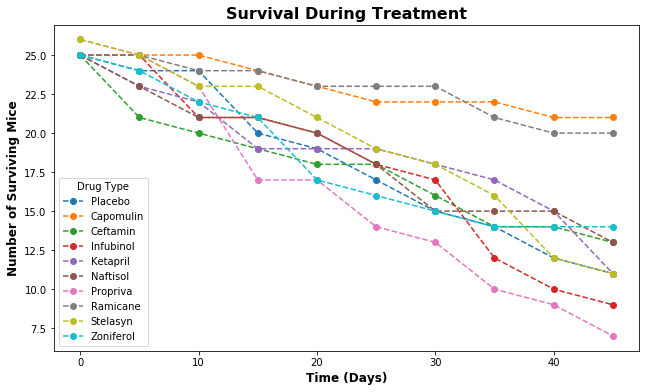

In [36]:
# Generate the Plot (Accounting for percentages)
# Divide aggregated dataset by drug type

placebo_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Placebo', :]
capomulin_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Capomulin', :]
ceftamin_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Ceftamin', :]
infubinol_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Infubinol', :]
ketapril_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Ketapril', :]
naftisol_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Naftisol', :]
propriva_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Propriva', :]
ramicane_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Ramicane', :]
stelasyn_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Stelasyn', :]
zoniferol_mice_df = mouse_count_reset.loc[mouse_count_reset['Drug'] == 'Zoniferol', :]

# Set x-axis values for chart

x_axis = mouse_count_pivot_df.index.values

# Format chart (size, labels, title)

plt.subplots(figsize=(10.5,6))
plt.xlabel("Time (Days)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Surviving Mice", fontsize=12, fontweight='bold')
plt.title("Survival During Treatment", fontsize=16, fontweight='bold')

# Add data to chart

plt.plot(placebo_mice_df['Timepoint'], placebo_mice_df['Mouse ID'], '--o', label="Placebo")
plt.plot(capomulin_mice_df['Timepoint'], capomulin_mice_df['Mouse ID'], '--o', label="Capomulin")
plt.plot(ceftamin_mice_df['Timepoint'], ceftamin_mice_df['Mouse ID'], '--o', label="Ceftamin")
plt.plot(infubinol_mice_df['Timepoint'], infubinol_mice_df['Mouse ID'], '--o', label="Infubinol")
plt.plot(ketapril_mice_df['Timepoint'], ketapril_mice_df['Mouse ID'], '--o', label="Ketapril")
plt.plot(naftisol_mice_df['Timepoint'], naftisol_mice_df['Mouse ID'], '--o', label="Naftisol")
plt.plot(propriva_mice_df['Timepoint'], propriva_mice_df['Mouse ID'], '--o', label="Propriva")
plt.plot(ramicane_mice_df['Timepoint'], ramicane_mice_df['Mouse ID'], '--o', label="Ramicane")
plt.plot(stelasyn_mice_df['Timepoint'], stelasyn_mice_df['Mouse ID'], '--o', label="Stelasyn")
plt.plot(zoniferol_mice_df['Timepoint'], zoniferol_mice_df['Mouse ID'], '--o', label="Zoniferol")

# Add Legend

plt.legend(loc="best", title="Drug Type")# Divide aggregated dataset by drug type


# Show the Figure
plt.show()



## Summary Bar Graph

In [65]:
# # Calculate the percent changes for each drug 
# y2-y1/y1 *100 = %
# percent_change = (drugs_tumors_df("Timepoint"[0])) - [(drugs_tumors_df("Timepoint"[45]))
# percent_change
# percent_change_first = mean_tumor.iloc[0,0]
# percent_change_first
#  percent_change_last = drugs_tumors_df.iloc[9,0]
# percent_change_last

placebo_mice_pc = (((drugs_tumors_df.iloc[9,0]) - (drugs_tumors_df.iloc[0,0])) / (drugs_tumors_df.iloc[0,0])) *100
capomulin_mice_pc = (((drugs_tumors_df.iloc[9,1]) - (drugs_tumors_df.iloc[0,1])) / (drugs_tumors_df.iloc[0,1])) *100
ceftamin_mice_pc = (((drugs_tumors_df.iloc[9,2]) - (drugs_tumors_df.iloc[0,2])) / (drugs_tumors_df.iloc[0,2])) *100
infubinol_mice_pc = (((drugs_tumors_df.iloc[9,3]) - (drugs_tumors_df.iloc[0,3])) / (drugs_tumors_df.iloc[0,3])) *100
ketapril_mice_pc = (((drugs_tumors_df.iloc[9,4]) - (drugs_tumors_df.iloc[0,4])) / (drugs_tumors_df.iloc[0,4])) *100
naftisol_mice_pc = (((drugs_tumors_df.iloc[9,5]) - (drugs_tumors_df.iloc[0,5])) / (drugs_tumors_df.iloc[0,5])) *100
propriva_mice_pc = (((drugs_tumors_df.iloc[9,6]) - (drugs_tumors_df.iloc[0,6])) / (drugs_tumors_df.iloc[0,6])) *100
ramicane_mice_pc = (((drugs_tumors_df.iloc[9,7]) - (drugs_tumors_df.iloc[0,7])) / (drugs_tumors_df.iloc[0,7])) *100
stelasyn_mice_pc = (((drugs_tumors_df.iloc[9,8]) - (drugs_tumors_df.iloc[0,8])) / (drugs_tumors_df.iloc[0,8])) *100
zoniferol_mice_pc = (((drugs_tumors_df.iloc[9,9]) - (drugs_tumors_df.iloc[0,9])) / (drugs_tumors_df.iloc[0,9])) *100

print(placebo_mice_pc, capomulin_mice_pc, ceftamin_mice_pc, infubinol_mice_pc, ketapril_mice_pc, naftisol_mice_pc, propriva_mice_pc, ramicane_mice_pc, stelasyn_mice_pc, zoniferol_mice_pc )
# Display the data to confirm


-19.475302667894173 42.51649185589744 46.12347172785187 57.028794686606076 53.92334713476923 51.29796048315153 47.24117486320637 -22.320900462766673 52.085134287899024 46.57975086509525


In [80]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
i = []
def passing(row):
    if ((((drugs_tumors_df.iloc[9,i+1]) - (drugs_tumors_df.iloc[0,i+1])) / (drugs_tumors_df.iloc[0,i+1])) *100) >= 0:
        return True
    else:
        return False
    i.append()

[]

TypeError: unsupported operand type(s) for +: 'int' and 'set'

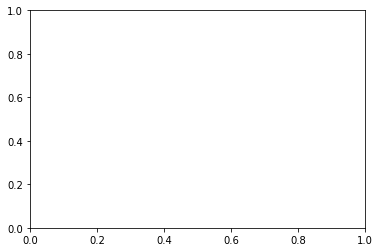

In [84]:
x_axis = np.arange(len(drugs_tumors_df))
percent_change = {placebo_mice_pc, capomulin_mice_pc,ceftamin_mice_pc, infubinol_mice_pc,ketapril_mice_pc, naftisol_mice_pc,propriva_mice_pc,ramicane_mice_pc,stelasyn_mice_pc , zoniferol_mice_pc }     
plt.bar(x_axis, percent_change, color='r', alpha=0.5)

In [16]:

# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

In [71]:
# percent_change = []
#     percent_change.append(((drugs_tumors_df.iloc[9,0]) - (drugs_tumors_df.iloc[0,0])) / (drugs_tumors_df.iloc[0,0])) *100)
# percent_change

IndentationError: unexpected indent (<ipython-input-71-51d5ee5e00bb>, line 2)

In [ ]:
### Below was help I found/received...

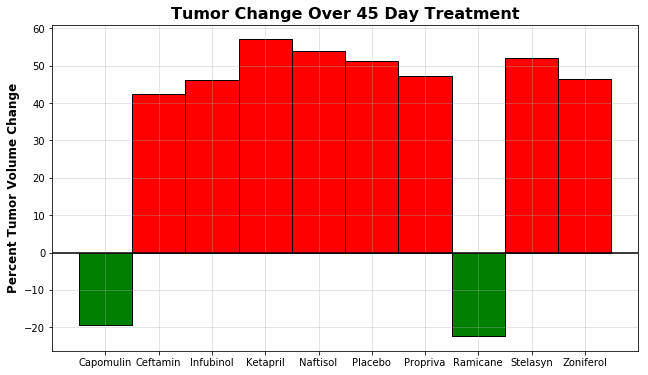

In [82]:
# Format aggregated tumor volume dataframe

percent_change_df = mean_tumor.xs('Tumor Volume (mm3)', axis=1, drop_level=True)
percent_change_df_reset = percent_change_df.reset_index()

# Filter data to average tumor volume at final timepoint

percent_change_df_fortyfive = percent_change_df_reset.loc[percent_change_df_reset['Timepoint'] == 45, ['Drug', 'mean']]

# Calculate percent change in tumor volume for each drug

percent_change_df_fortyfive['Percent Change'] = ((percent_change_df_fortyfive['mean'] - 45) / 45) * 100

# Create function to calculate whether percent change is positive or negative
# Function returns True if positive or zero and False if negative

def above_zero(row):
    if row['Percent Change'] >= 0 :
        return True
    else:
        return False

# Add column to dataframe indicating whether percent change is positive or negative
    
percent_change_df_fortyfive['above_zero'] = percent_change_df_fortyfive.apply (lambda row: above_zero (row),axis=1)

# Assign aspects of data needed for charting to variables

percent_change = percent_change_df_fortyfive['Percent Change']
xlabels = percent_change_df_fortyfive['Drug']
x_axis = np.arange(len(percent_change))

fig, ax = plt.subplots(figsize=(10.5, 6))
percent_plot = ax.bar(x_axis, percent_change, width=1.0, edgecolor="black", color=percent_change_df_fortyfive.above_zero.map({True: 'r', False: 'g'}))
ax.set_xticks(x_axis)
ax.set_xticklabels(xlabels)

ax.set_ylabel("Percent Tumor Volume Change", fontsize=12, fontweight="bold")
ax.set_xlabel("")
ax.set_title("Tumor Change Over 45 Day Treatment", fontsize=16, fontweight="bold")

plt.axhline(y=0, color="black", linestyle='-')
plt.grid(alpha=0.4)

# Create function to calculate where to add data labels to chart and what text to add and to place labels

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        p_height = (height / y_height)

        if height > 0:
            label_position = 0.5
        elif height < 0:
            label_position = -4

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                str(round(height, 2))+'%',
                ha='center', va='bottom', color="white", fontweight="bold")